In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn

In [2]:
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


### Steps 
1. Data cleaning - checking for null values, dropping columns, adding columns and so on 


In [3]:
## drop unneessary columns
df = df.drop(columns = ['Unnamed: 0', 'year', 'month'], axis =1)

In [4]:
## checking for null values 
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

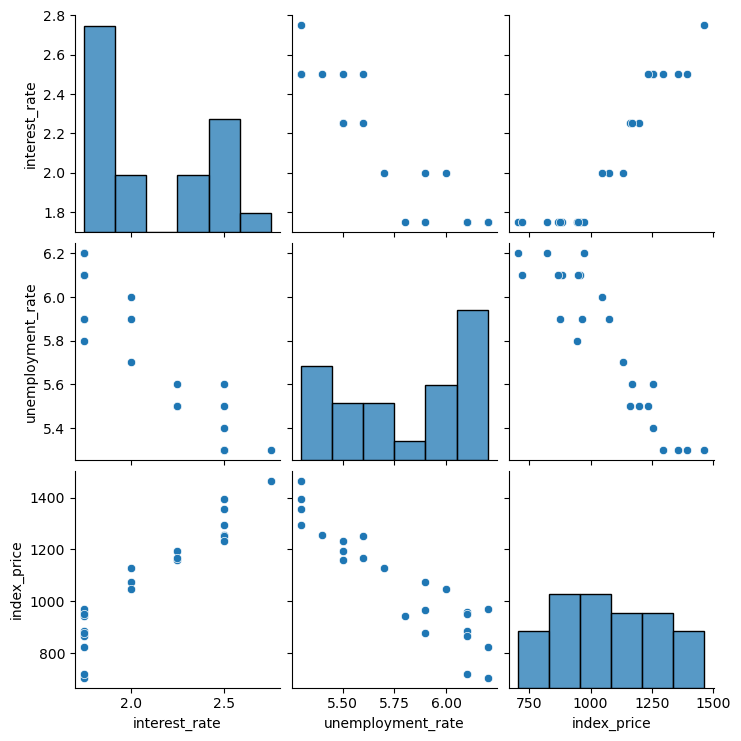

In [5]:
## lets do some visualization
import seaborn as sns
sns.pairplot(df)


In [6]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

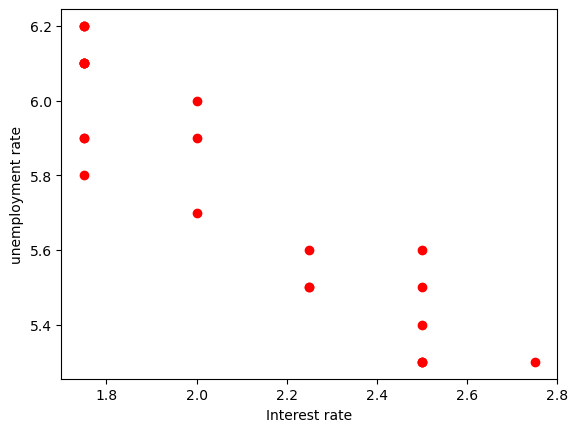

In [7]:
## visualoze the data points more closely
plt.scatter(df['interest_rate'], df['unemployment_rate'], color = 'red')
plt.xlabel('Interest rate')
plt.ylabel('unemployment rate')




In [8]:
## independent and dependent features 
#another way x = df.iloc[:, : -1]
x = df[['interest_rate', 'unemployment_rate']]
y = df['index_price']

In [9]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [10]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [11]:
## train test split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

In [12]:
import seaborn as sns 

<Axes: xlabel='interest_rate', ylabel='index_price'>

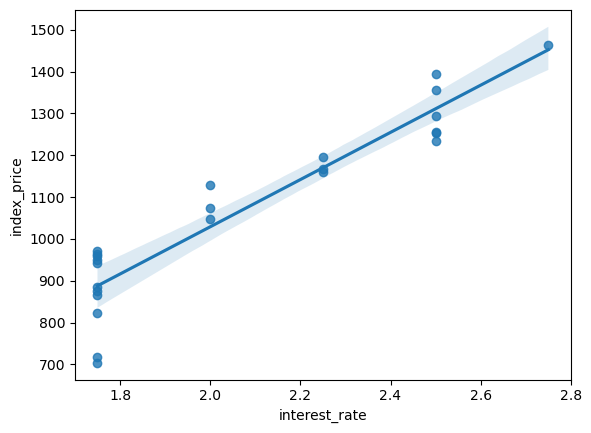

In [13]:
sns.regplot(x='interest_rate', y='index_price', data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

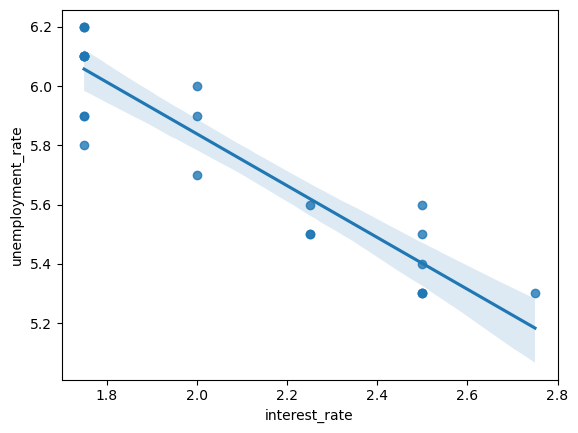

In [14]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

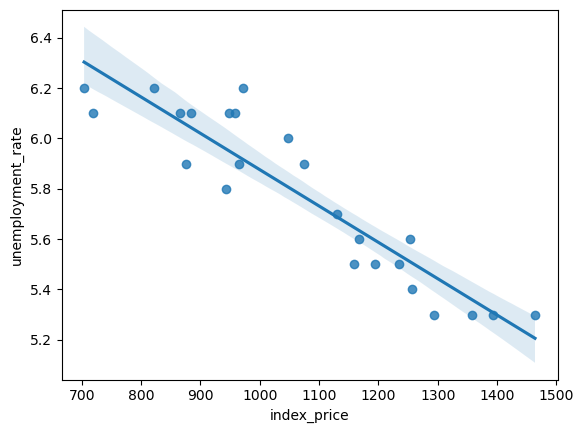

In [15]:
sns.regplot(x='index_price', y='unemployment_rate', data=df)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [18]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [19]:
## cross validation 
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, x_train,y_train, scoring = 'neg_mean_squared_error', cv = 3 )




In [20]:
validation_score.mean()

-5914.828180162388

In [21]:
## prediction 
y_pred = regression.predict(x_test)

In [22]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [25]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.7591371539010257


In [26]:
# display adjusted R-squared 
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.5985619231683761

## Assumptions 

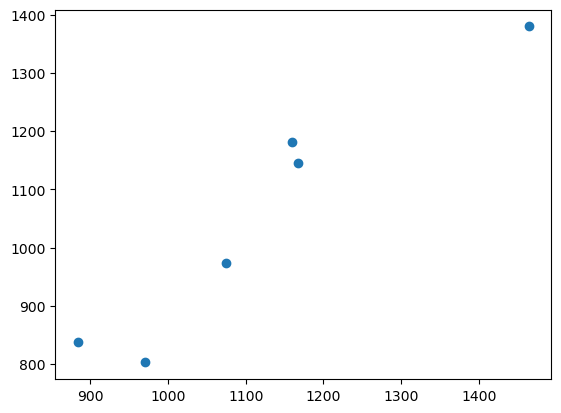

In [27]:
plt.scatter(y_test, y_pred)

In [28]:
residuals = y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


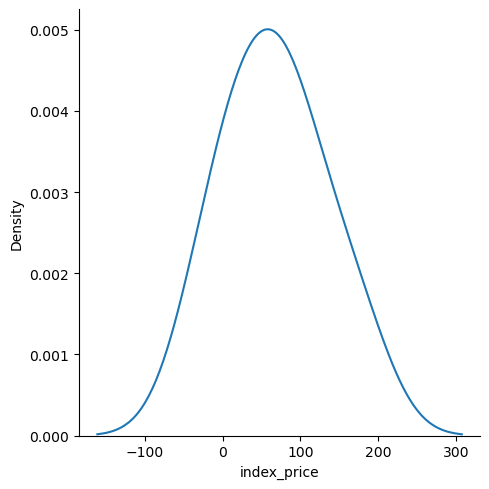

In [29]:
sns.displot(residuals, kind = 'kde')

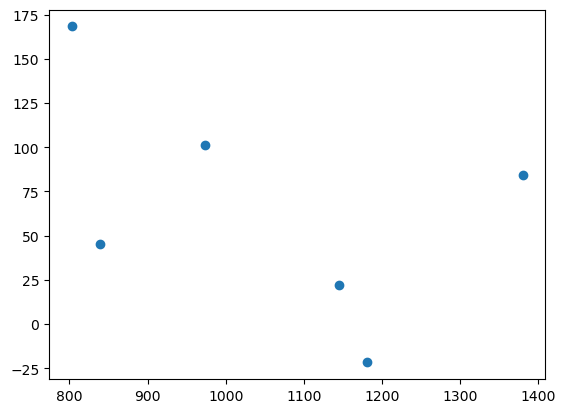

In [30]:
## scatter plot with respect to predictiom and rresiduals
plt.scatter(y_pred, residuals)

In [31]:
## OLS Linear Regression 
import statsmodels.api as sm
model = sm.OLS(y_train, x_train).fit()
prediction = model.predict(x_test)
print(prediction)

[ 127.30223686 -250.70164745  326.390126   -214.91844842  -79.59130481
   91.51903783]


In [32]:
model.summary()

/Users/binitachhetri/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 30 Dec 2023   Prob (F-statistic):                       0.754
Time:                        21:37:29   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
print(regression.coef_)

[  88.27275507 -116.25716066]


In [34]:
#regression.predict(scaler.transform([[72]]))